# Purpose
Analyze the distributions of our features and target as well as any correlations.

Features:
- Career Average Standing Significant Strike Attempts per 15 Minutes
    - This metric includes all significant strikes except those on the ground
    
Target:
- Combined Average Standing Significant Strike Attempts per 15 Minutes
    - This is the sum of the per 15 minute rates of both fighters in the bout

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
data = pd.read_csv('../../data/modelling_data/model_1_data.csv', index_col=0)
data.head()

## Target Distributions

In [3]:
data.c_s_ss_a_p15m.describe()

count    3971.000000
mean      215.304286
std       135.906592
min         0.000000
25%       114.623568
50%       196.000000
75%       290.000000
max      1221.428571
Name: c_s_ss_a_p15m, dtype: float64

### Outliers
Our highest value is 1221 which would mean that the fighters threw a combined 1 to 2 strikes per second. This seems high, so let's check them out.

In [5]:
data.sort_values('c_s_ss_a_p15m', ascending=False).head()

,date_0,bout_id,fighter_id_0,ca_s_ss_a_p15m_0,fighter_id_1,ca_s_ss_a_p15m_1,c_s_ss_a_p15m
2108,2016-07-30,8495283a56311b4d,c727c7d31c50c4cf,69.794849,3f11b5d4bd76a6d9,6.569343,1221.428571
1556,2015-08-01,60c62fb7bd17a8b3,8bdac25ce0bb874d,135.972337,673ea7dcc786b1b3,208.758621,1217.647059
183,2016-12-30,0aad210fbaa1db6c,8bdac25ce0bb874d,217.767874,80fa8218c99f9c58,61.680965,1143.750000
868,2019-08-31,357cf8a9b6737625,6a1901c62ab3870f,179.068722,1ebe20ebbfa15e29,142.838397,1028.571429
522,2002-09-27,20a6710c50698166,275cafc9de131c83,78.709091,1652f3213655b935,32.731844,1000.000000


If you add the bout id to the end of this link 'http://www.ufcstats.com/fight-details/', you would see that the first 3 fights are:
1. Anthony Hamilton knocks out Damian Grabowski in 14 seconds
2. Ronda Rousey knocks out Alexis Davis in 16 seconds
3. Amanda Nunes knocks out Ronda Rousey in 48 Seconds

Even though these fights do not consist of nonstop striking for 15 minutes straight, they are still striking matches, so the target is technically able to measure that. I may want to convert this into a classification problem and just try to predict whether a fight will be above a certain threshold, but for now we'll see how a regressor works.

##### Let's see whatour distribution looks like

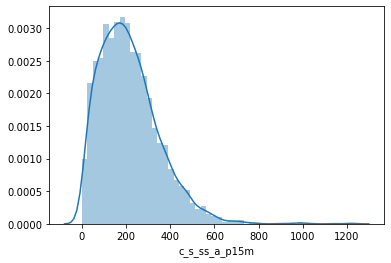

In [7]:
sns.distplot(data.c_s_ss_a_p15m)

We have a right skewed distribution with no values falling below 0, as expected.

## Career Average Significant Strike Attempts per 15 Minutes

In [9]:
data.ca_s_ss_a_p15m_0.describe()

count    3971.000000
mean       98.985858
std        50.938122
min         0.000000
25%        64.484963
50%        92.780844
75%       127.540621
max       940.909091
Name: ca_s_ss_a_p15m_0, dtype: float64

In [10]:
data.ca_s_ss_a_p15m_1.describe()

count    3971.000000
mean       99.788669
std        53.270166
min         0.000000
25%        64.971194
50%        92.381756
75%       130.117927
max       585.000000
Name: ca_s_ss_a_p15m_1, dtype: float64

### Outliers
Lets check out the top performing fighters in each row

#### Fighter 0

In [11]:
data.sort_values('ca_s_ss_a_p15m_0', ascending=False).head()

,date_0,bout_id,fighter_id_0,ca_s_ss_a_p15m_0,fighter_id_1,ca_s_ss_a_p15m_1,c_s_ss_a_p15m
354,2012-05-05,151f9966cae7682c,e4aaaa34535e32b6,940.909091,173acb3f920082b8,57.636364,243.812709
1509,2013-08-17,5d839e4eda09d6e4,f4c49976c75c5ab2,389.552239,150ff4cc642270b9,219.653110,230.000000
3486,2004-06-19,dffef4343e822399,2a542ee8a8b83559,332.405705,1ff9589f9065a9ed,43.869947,144.000000
525,2015-08-23,20b70a226f1c13fb,b4192a975027aab6,320.000000,46a2f24feb258ae0,199.000000,299.000000
3139,2015-07-18,c7780ac294530c0d,654ae722109a0d31,319.626168,19db7ac26308178f,105.666667,214.054054


If you add the fighter id to the end of this link 'http://www.ufcstats.com/fighter-details/', you can find out the names and records of each of these fighters.

Let's look at the first row: figher 0 in the first row has a career sig strike att. per 15m of about 940 on 2012-05-05. The fighter is Nick Denis who only had one UFC fight prior to this which was a first round knockout.

#### Fighter 1

In [12]:
data.sort_values('ca_s_ss_a_p15m_1', ascending=False).head()

,date_0,bout_id,fighter_id_0,ca_s_ss_a_p15m_0,fighter_id_1,ca_s_ss_a_p15m_1,c_s_ss_a_p15m
2796,2005-08-06,b2f604f2332cd8af,ea3ef6206c7907d5,66.000000,9fe85152f351e737,585.000000,368.181818
2086,2008-12-10,83406cd29d3c2d0f,cbf94e4c4af4ff6d,10.344828,89b8d1bf1ff09d1d,521.052632,279.000000
832,2003-02-28,334cd8572d9842cb,50cc91ce2982785d,24.632220,2a542ee8a8b83559,507.480583,133.333333
1217,2007-09-22,4a7d39ebc9dce5db,7d21de9c6d7c98b2,70.967591,365fee2da473b177,484.615385,91.621622
3481,2018-11-03,df9aa51f6ccdfe02,f9b200db02b488d9,179.538732,dccb63727f2f5f74,450.000000,337.000000


Figher 1 in the first row has a career sig strike att. per 15m of 585 on 2005-08-06. The fighter is Mike Swick who only had one UFC fight prior to this which was a first round knockout.

### Correlation

In [14]:
data.corr()

,ca_s_ss_a_p15m_0,ca_s_ss_a_p15m_1,c_s_ss_a_p15m
ca_s_ss_a_p15m_0,1.000000,0.142098,0.302473
ca_s_ss_a_p15m_1,0.142098,1.000000,0.243444
c_s_ss_a_p15m,0.302473,0.243444,1.000000


The correlations between the target and fighter 0 is higher than the correlation between the target and fighter 1. This is unexpected because the ordering of the ordering of the fighters was random.

# Conclusion
### Standing Significant Strike Rate
Measuring strike attempts per 15 minutes can be used as a measure of how much striking occurs in a fight. First round knockouts create some outliers that seem unrealistic because they are often the result of an extemely high rate of striking activity that is unsustainable. Therefore, Career Average Significant Strike Attempts per 15 Minutes cannot measure a fighters ability to sustain that rate. 


### Correlations
The career averages for fighter 0 have a pearson correlation coefficient of .3, while fighter 1 has .24. Ideally, we would see the almost exactly the same correlation between each fighter, because their order shouldn't matter.

This could be due to random chance but it may warrant some preprocessing that will randomize which order the fighters are listed.
